# Import required libraries

In [ ]:
#connecting google drive with google colab

from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
# importing essential libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing I/O CSV

In [ ]:
# loading the dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/restaurant_analysis/sentiment_data.tsv',delimiter="\t",quoting=3)

In [ ]:
# shape = tuple of array dimension (row, column)
data.shape

In [ ]:
# returns the label of each column in the Dataframe
data.columns

In [ ]:
# view the data
data.head

In [ ]:
# @title
# Information about the data
data.info

In [ ]:
# Importing essential libraries for performing natural language processing on sentiment_data.tsv dataset
import nltk     # natural language toolkit is a package that we can use for NLP
import re       # python has built in package re that we can use to work with regual expressions
nltk.download("stopwords")   # The NLTK corpus is a massive dump of all kinds of natural language data sets that are definetly worth looking at
from nltk.corpus import stopwords   # a Stop word is a word like (a, an, the, in ) that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer    # Porter stemmer is mainly known for data mining and and Information retrival

In [ ]:
# Cleaning the reviews
corpus = []
for i in range(0, 1000):
    # cleaning special character from from the reviews
    # re.sub() is used to global search and replace on the given string
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i]).lower()
    review_words = review.split()

    # remove the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    #stop words are words which does not add any meaning to sentence

    #stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the words
    review = " ".join(review)
    corpus.append(review)

In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
# Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer     # CountVectorizer is a method to convert text into numerical data
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

# Split data - (1000, 1500)


*   In this step, we are going to split data in two parts(traning and testing), so that we can train our model on training and test its accuracy on unseen test data.

In [ ]:
from sklearn.model_selection import train_test_split     # use to split the original data into training data & test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


# random_state simply sets seed to the random generator, so that your train-test are always deterministic. If you don't set seed, it is differnent each time.

# training (1000, 1500)
# 1000*80/100 = 800
# 1000*20/100 = 200

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

Takeway Points:


*   Usually we take more and more data in training so it's easy for the model to learn with data




# Model Training


*   As we done with pre-pocessing part, it is time to train our model. I am going to train model.


---


*   Multinomial Naive Bayes- The algorithm is a probablistic learning method that is used in Natural Language Processing(NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of small or newspaper article.

In [ ]:
# Fitting Naive Bayes to the Training Set

from sklearn.naive_bayes import MultinomialNB
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

classifire = MultinomialNB()
classifire.fit(x_train, y_train)    # fit training data

MultinomialNB()

In [ ]:
# Predicting the test set results
y_pred = classifire.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score
# in python the accuracy_score function of the sklearn, metrics package calculates the accuracy score for a set of predicted labels against the true lables.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("scores".center(14,"-"))
print(f"Accuracy score : {round(score1*100,2)}")
print(f"Precision score : {round(score2*100,2)}")
print(f"Recall score : {round(score3*100,2)}")

----scores----
Accuracy score : 76.5
Precision score : 76.42
Recall score : 78.64


In [ ]:
# making the confusion matrix
#A confusion matrix is a table that is used to define the performance of a classification algorithm.
#A confusion matrix visualizes and summarizes the performance of a classification.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

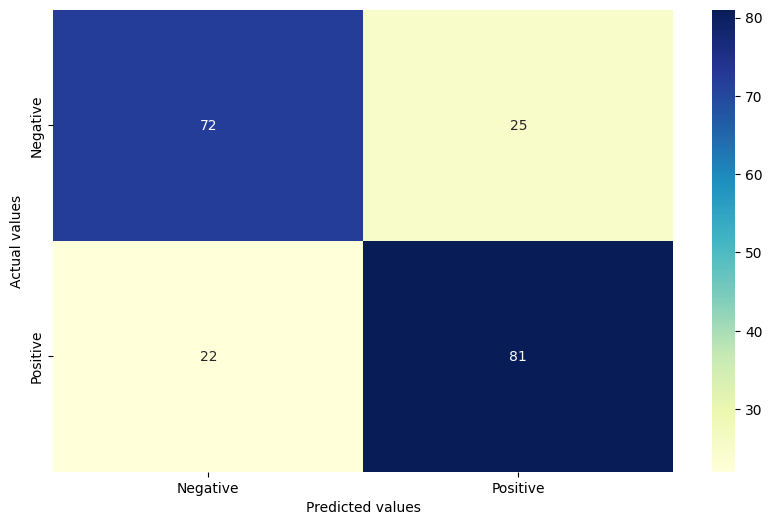

In [ ]:
# plotting the confusion matrix

import matplotlib.pyplot as plt       # matplotlib is a low level graph plotting library in python that serves as a visulization utility
import seaborn as sns                 # seaborn is python data visulization library based on matplotlib
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [ ]:
# Hyperpramater tuning the Naive Bayes classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(x_train,y_train)
    temp_y_pred = temp_classifier.predict(x_test)
    score = accuracy_score(y_test, temp_y_pred)
    print(f"Accuracy score for Alpha {round(i)} = {round(score*100,2)}")
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print("-"*10)
print(f"Best accuracy score is {round(best_accuracy*100,2)} with alpha value as {round(alpha_val,1)}")

Accuracy score for Alpha 0 = 78.0
Accuracy score for Alpha 0 = 78.5
Accuracy score for Alpha 0 = 78.0
Accuracy score for Alpha 0 = 78.0
Accuracy score for Alpha 0 = 77.5
Accuracy score for Alpha 1 = 77.5
Accuracy score for Alpha 1 = 77.5
Accuracy score for Alpha 1 = 77.0
Accuracy score for Alpha 1 = 76.5
Accuracy score for Alpha 1 = 76.5
----------
Best accuracy score is 78.5 with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.2)

# Predictions

In [ ]:
from pandas.core.strings.accessor import F
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^A-Za-z]', repl=' ', string=sample_review).lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()

    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = " ".join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [ ]:
# Predicting the values.
def predict(sample_review):
    if predict_sentiment(sample_review) :
        print('POSITIVE review!')
    else:
        print('NEGATIVE review!')

In [ ]:
# Predicting the values
sample_review = 'I loved eating pizza here!'
predict(sample_review)

POSITIVE review!


In [ ]:
# Predicting the values
sample_review = 'I loved eating pizza here but overall bad experience!'
predict(sample_review)

NEGATIVE review!


In [ ]:
# Predicting the values
sample_review = 'wondarful service here also the staff was good.'
predict(sample_review)

POSITIVE review!


# Random Forest

In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(data['Review'],data['Liked'],test_size=0.2, random_state=2)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# create and test Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(x_train_tfidf, y_train)

In [ ]:
# Making predictions
y_pred = rf.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)


print(f"Testing Accuracy: {accuracy*100:.2f} %")
print(f"Recall: {recall_score(y_test, y_pred)*100:.2f} %")
print(f"Precision: {precision_score(y_test, y_pred)*100:.2f} %")

# print(f"Training accuracy {accuracy_score(y_train, y_train_pred)*100:.2f}")

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score

x = data['Review']
y = data['Liked']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=0)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)
y_train_pred = svm_classifier.predict(X_train_tfidf)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Testing Accuracy: {accuracy*100:.2f} %")
print(f"Recall: {recall*100:.2f} %")
print(f"Precision: {precision*100:.2f} %")

print(f"Training accuracy {accuracy_score(y_train, y_train_pred)*100:.2f}")

In [ ]:
from pandas.core.strings.accessor import F
def predict_sentiment(sample_review):
    new_review_tfidf = tfidf_vectorizer.transform([sample_review])
    return svm_classifier.predict(new_review_tfidf)[0]

def predict(review):
  if predict_sentiment(review) :
      print("POSITIVE review")
  else:
      print("NEGATIVE review")

In [34]:
sample = "i will visit to another restaurant next time not this one"

predict(sample)

NEGATIVE review
